Assumption: we have an input text of 6 words, and each word is represented by a 512 dimension vector.

In this case, the $sequence = 6$ and $d_{model} = 512$.

Therefore:

$\text{Input matrix} (sequence, d_{model}) = (6, 512)$

Let's assume that our words are:

$\text{A, B, C, D, E, F}$

Then, the illustration of the input matrix looks like this:

$$
\text{Input matrix} = \begin{bmatrix}
\text{A}, & \text{B}, & \text{C}, & \text{D}, & \text{E}, & \text{F} \\
\end{bmatrix}
$$


Let's assume that each word has the following 512 columns of numerical representation (basically acting like 512 dimensions):

$$

\text{word} = \begin{bmatrix}
W_{0},  & W_{1}, & W_{2}, & \dots & W_{511} \\
\end{bmatrix}
$$

Note that each $W_{i}$ here is a number.

With this background, the input matrix (let's call it $W$) in an expanded form should look like this:

$$
W = \begin{bmatrix}
\begin{bmatrix} \text{A}_0, & \text{A}_1, & \text{A}_2, & \dots, & \text{A}_{511} \end{bmatrix} \\
\begin{bmatrix} \text{B}_0, & \text{B}_1, & \text{B}_2, & \dots, & \text{B}_{511} \end{bmatrix} \\
\begin{bmatrix} \text{C}_0, & \text{C}_1, & \text{C}_2, & \dots, & \text{C}_{511} \end{bmatrix} \\
\begin{bmatrix} \text{D}_0, & \text{D}_1, & \text{D}_2, & \dots, & \text{D}_{511} \end{bmatrix} \\
\begin{bmatrix} \text{E}_0, & \text{E}_1, & \text{E}_2, & \dots, & \text{E}_{511} \end{bmatrix} \\
\begin{bmatrix} \text{F}_0, & \text{F}_1, & \text{F}_2, & \dots, & \text{F}_{511} \end{bmatrix}
\end{bmatrix}
$$

The shape, as we can clearly see, is $(6, 512)$.

Also, the transpose of this looks like this:

$$
W^\text{T} = \begin{bmatrix}
\begin{bmatrix} \text{A}_0, & \text{B}_0, & \text{C}_0, & \text{D}_0, & \text{E}_0, & \text{F}_0 \end{bmatrix} \\
\begin{bmatrix} \text{A}_1, & \text{B}_1, & \text{C}_1, & \text{D}_1, & \text{E}_1, & \text{F}_1 \end{bmatrix} \\
\begin{bmatrix} \text{A}_2, & \text{B}_2, & \text{C}_2, & \text{D}_2, & \text{E}_2, & \text{F}_2 \end{bmatrix} \\
\begin{bmatrix} \text{A}_3, & \text{B}_3, & \text{C}_3, & \text{D}_3, & \text{E}_3, & \text{F}_3 \end{bmatrix} \\
\vdots \\
\begin{bmatrix} \text{A}_{511}, & \text{B}_{511}, & \text{C}_{511}, & \text{D}_{511}, & \text{E}_{511}, & \text{F}_{511} \end{bmatrix}
\end{bmatrix}
$$

The shape of this is $(512, 6)$.

In [1]:
import torch
import torch.nn as nn

In [2]:
torch.manual_seed(40)
input_matrix = torch.randn(6, 512)
input_matrix.shape, input_matrix

(torch.Size([6, 512]),
 tensor([[-0.2367,  1.8109,  0.1966,  ..., -0.6320,  0.3352,  0.3928],
         [ 0.0783,  0.5694, -0.6083,  ...,  0.3377,  0.9911, -1.0636],
         [ 0.0525, -0.4094, -0.7481,  ...,  0.7475, -1.0518, -0.2402],
         [-0.7422,  0.5986,  1.1324,  ...,  0.6658, -1.9029,  0.3874],
         [ 0.3757, -0.0370,  0.0536,  ...,  1.3480, -0.3502,  1.4096],
         [ 0.3379,  0.6135,  0.3060,  ..., -0.1643, -1.4237,  1.1242]]))

In [3]:
input_matrix.T.shape, input_matrix.T

(torch.Size([512, 6]),
 tensor([[-0.2367,  0.0783,  0.0525, -0.7422,  0.3757,  0.3379],
         [ 1.8109,  0.5694, -0.4094,  0.5986, -0.0370,  0.6135],
         [ 0.1966, -0.6083, -0.7481,  1.1324,  0.0536,  0.3060],
         ...,
         [-0.6320,  0.3377,  0.7475,  0.6658,  1.3480, -0.1643],
         [ 0.3352,  0.9911, -1.0518, -1.9029, -0.3502, -1.4237],
         [ 0.3928, -1.0636, -0.2402,  0.3874,  1.4096,  1.1242]]))

In [4]:
transpose_dotproduct = input_matrix @ input_matrix.T
transpose_dotproduct.shape, transpose_dotproduct

(torch.Size([6, 6]),
 tensor([[503.2782,  30.9015, -25.3849,  13.0093, -29.7297,  20.1604],
         [ 30.9015, 536.9385, -23.3817, -70.6838,  -8.7096, -19.2283],
         [-25.3849, -23.3817, 484.9792,  24.6444, -29.3236,  -0.9737],
         [ 13.0093, -70.6838,  24.6444, 538.0654, -25.3541,  -8.6208],
         [-29.7297,  -8.7096, -29.3236, -25.3541, 453.2016,  -5.3324],
         [ 20.1604, -19.2283,  -0.9737,  -8.6208,  -5.3324, 539.1165]]))

In [5]:
A = input_matrix[0][:]  # first row
A @ A.T  # basically dot product of A and A^T

/var/folders/27/84mpvnn15tlby6jt5y456k5c0000gn/T/ipykernel_73420/3060185599.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  A @ A.T # basically dot product of A and A^T


tensor(503.2783)

## Positional Encoding

Formulas for positional encoding in the original transformer paper are:

$$
\begin{aligned}
PE_{(pos, 2i)} &= \sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right) \quad \text{(even indices)} \\
PE_{(pos, 2i+1)} &= \cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right) \quad \text{(odd indices)}
\end{aligned}
$$

where $pos$ is the position of the word in the sentence, and $i$ is the dimension index (starting from 0 to $d_{model} - 1$).









## Multi-Head Attention

Formula for multi-head attention in the original transformer paper is:

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(\text{head}_1, \text{head}_2, \dots, \text{head}_h)W^\text{O}
$$

where:

$
\text{head}_i = \text{Attention}(QW_i^Q, KW_i^K, VW_i^V)
$

where $W_i^Q, W_i^K, W_i^V$ are the weights for the $i$-th head.

and:

$
W^\text{O} = \begin{bmatrix}
W_1^\text{O}, & W_2^\text{O}, & \dots, & W_h^\text{O}
\end{bmatrix}
$



In [6]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

In [7]:
vocab_size = tokenizer.n_vocab  # 50257
d_model = 512

embedding_matrix = nn.Embedding(num_embeddings=vocab_size, embedding_dim=d_model)


def tokenize_text(text):
    token_ids = tokenizer.encode(text)
    embeddings = embedding_matrix(torch.stack([torch.tensor(token_ids)], dim=0))
    return token_ids, embeddings


def tokenize_batch(texts):
    token_ids_list = [tokenizer.encode(text) for text in texts]

    # need the max text size out of all the texts
    max_seq_len = max([len(token_ids) for token_ids in token_ids_list])

    # pad all the texts to the max sequence length (for batch processing)
    padded_token_ids = []
    for ids in token_ids_list:
        padded_ids = ids + [0] * (max_seq_len - len(ids))  # Padding with 0s
        padded_token_ids.append(padded_ids)

    # Convert to tensor and get embeddings
    tokens_tensor = torch.tensor(padded_token_ids)
    embeddings = embedding_matrix(tokens_tensor)

    return token_ids_list, embeddings


def decode_text(token_ids):
    return tokenizer.decode(token_ids)


def decode_batch(token_ids_list):
    return [decode_text(token_ids) for token_ids in token_ids_list]

In [8]:
input_text = []
input_text1 = "This is a keyboard"
input_text2 = "A nice coffee cup"
input_text.append(input_text1)
input_text.append(input_text2)

In [9]:
# for a single text
token_ids_single, input_embeddings_single = tokenize_text(input_text[0])
print("\nFor a single text:")
print(input_embeddings_single.shape)
print(input_embeddings_single)
print(token_ids_single)

# for batched processing
token_ids, input_embeddings = tokenize_batch(input_text)

# batch size, sequence length (i.e., number of words), embedding dimension
print("\nFor batched processing:")
print(input_embeddings.shape)
print(input_embeddings)
print(token_ids)


For a single text:
torch.Size([1, 4, 512])
tensor([[[ 0.8884,  3.1415, -0.7241,  ..., -0.8155, -0.0804,  1.9023],
         [ 0.6572, -1.5998,  1.3872,  ...,  0.3046,  0.6751, -1.5896],
         [ 0.5262,  0.3106, -0.4733,  ...,  0.5922,  1.3402,  1.1434],
         [-0.7888,  1.1974, -2.1260,  ..., -0.0547,  1.4225,  0.5274]]],
       grad_fn=<EmbeddingBackward0>)
[1212, 318, 257, 10586]

For batched processing:
torch.Size([2, 4, 512])
tensor([[[ 0.8884,  3.1415, -0.7241,  ..., -0.8155, -0.0804,  1.9023],
         [ 0.6572, -1.5998,  1.3872,  ...,  0.3046,  0.6751, -1.5896],
         [ 0.5262,  0.3106, -0.4733,  ...,  0.5922,  1.3402,  1.1434],
         [-0.7888,  1.1974, -2.1260,  ..., -0.0547,  1.4225,  0.5274]],

        [[ 0.0656, -0.0424,  1.5569,  ..., -0.1637,  0.3875, -0.2984],
         [-2.0431, -0.5853,  0.4171,  ...,  1.7363,  0.9222,  1.7586],
         [ 0.3237, -0.3181, -1.9688,  ..., -0.0987,  1.0463,  0.3429],
         [-0.8363,  1.0587,  0.1078,  ..., -0.2931,  2.0631, 

In [10]:
print("\nDecoded texts:")
print(decode_text(token_ids_single))
print(decode_batch(token_ids))


Decoded texts:
This is a keyboard
['This is a keyboard', 'A nice coffee cup']


Input embeddings -> DONE

### Let's do some positional encoding now

In [11]:
def positional_encoding_simple(pos: int, i: int, d_model=d_model):
    if i % 2 == 0:
        return torch.sin(
            torch.tensor(pos) / torch.pow(torch.tensor(10000), (2 * i) / d_model)
        )
    else:
        return torch.cos(
            torch.tensor(pos) / torch.pow(torch.tensor(10000), (2 * i) / d_model)
        )

this was a very simple function to understand the positional encoding. However, this helps calculate the positional encoding for a single position and a single dimension. Of course, I can always expand this, but instead of a loop, I think it's better to use vectorized operations.

In [12]:
input_embeddings.shape

torch.Size([2, 4, 512])

In [13]:
# vectorized and scalable version


def positional_encoding_original_paper(input_embeddings):
    batch, seq_len, d_model = input_embeddings.shape
    device = input_embeddings.device

    # Create position and dimension indices
    pos = torch.arange(seq_len, dtype=torch.float32, device=device).unsqueeze(1)
    dim = torch.arange(d_model, dtype=torch.float32, device=device)

    # Compute angle rates
    angle_rates = pos / (10000 ** (2 * dim / d_model))

    # Initialize encoding matrix
    pe = torch.zeros(seq_len, d_model, device=device)

    # Apply sine to even indices, cosine to odd indices
    pe[:, 0::2] = torch.sin(angle_rates[:, 0::2])
    pe[:, 1::2] = torch.cos(angle_rates[:, 1::2])

    # Add batch dimension and return
    return pe.unsqueeze(0).expand(batch, -1, -1) + input_embeddings


final_embeddings = positional_encoding_original_paper(input_embeddings)

print(input_embeddings)
print(final_embeddings)

tensor([[[ 0.8884,  3.1415, -0.7241,  ..., -0.8155, -0.0804,  1.9023],
         [ 0.6572, -1.5998,  1.3872,  ...,  0.3046,  0.6751, -1.5896],
         [ 0.5262,  0.3106, -0.4733,  ...,  0.5922,  1.3402,  1.1434],
         [-0.7888,  1.1974, -2.1260,  ..., -0.0547,  1.4225,  0.5274]],

        [[ 0.0656, -0.0424,  1.5569,  ..., -0.1637,  0.3875, -0.2984],
         [-2.0431, -0.5853,  0.4171,  ...,  1.7363,  0.9222,  1.7586],
         [ 0.3237, -0.3181, -1.9688,  ..., -0.0987,  1.0463,  0.3429],
         [-0.8363,  1.0587,  0.1078,  ..., -0.2931,  2.0631,  0.1255]]],
       grad_fn=<EmbeddingBackward0>)
tensor([[[ 0.8884,  4.1415, -0.7241,  ...,  0.1845, -0.0804,  2.9023],
         [ 1.4987, -1.0301,  2.1892,  ...,  1.3046,  0.6751, -0.5896],
         [ 1.4355, -0.0403,  0.4848,  ...,  1.5922,  1.3402,  2.1434],
         [-0.6477,  0.2279, -1.7832,  ...,  0.9453,  1.4225,  1.5274]],

        [[ 0.0656,  0.9576,  1.5569,  ...,  0.8363,  0.3875,  0.7016],
         [-1.2017, -0.0156,  1.219

In [14]:
print(positional_encoding_simple(0, 1) + input_embeddings[0][0][1])
print(positional_encoding_original_paper(input_embeddings)[0][0][1])

tensor(4.1415, grad_fn=<AddBackward0>)
tensor(4.1415, grad_fn=<SelectBackward0>)


An even more scalable version for the positional encoding is to use the following formula that uses the logarithmic version:

$$
PE_{(pos, i)} = \begin{cases} 
\sin\left(pos \cdot e^{-\frac{2i}{d_{\text{model}}} \ln (10000)}\right) & \text{if } i \text{ even} \\
\cos\left(pos \cdot e^{-\frac{2i}{d_{\text{model}}} \ln (10000)}\right) & \text{if } i \text{ odd}
\end{cases}
$$

compared to the original paper's formula:

$$
PE_{(pos, i)} = \begin{cases} 
\sin\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right) & \text{if } i \text{ even} \\
\cos\left(\frac{pos}{10000^{2i/d_{\text{model}}}}\right) & \text{if } i \text{ odd}
\end{cases}
$$

Proof of Equivalence:
$$
\frac{pos}{10000^{2i/d_{\text{model}}}} = pos \cdot e^{-\frac{2i}{d_{\text{model}}} \ln (10000)}
$$
 
This holds because:

$$
10000^x = e^{x \ln (10000)} \Rightarrow \frac{1}{10000} = e^{-\ln (10000)}
$$

In code:

In [15]:
input_embeddings.shape

torch.Size([2, 4, 512])

In [16]:
def positional_encoding(input_embeddings):
    batch, seq_len, d_model = input_embeddings.shape
    pos = torch.arange(seq_len).unsqueeze(1)
    dim = torch.arange(d_model)

    angle_rates = pos * torch.exp((-2 * dim * torch.log(torch.tensor(10000))) / d_model)

    pe = torch.zeros(seq_len, d_model)  # positional encoding initialized
    pe[:, 0::2] = torch.sin(angle_rates[:, 0::2])
    pe[:, 1::2] = torch.cos(angle_rates[:, 1::2])

    # add batch dimension
    pe = pe.unsqueeze(0).expand(batch, -1, -1) + input_embeddings
    return pe


positional_encoding(input_embeddings)

tensor([[[ 0.8884,  4.1415, -0.7241,  ...,  0.1845, -0.0804,  2.9023],
         [ 1.4987, -1.0301,  2.1892,  ...,  1.3046,  0.6751, -0.5896],
         [ 1.4355, -0.0403,  0.4848,  ...,  1.5922,  1.3402,  2.1434],
         [-0.6477,  0.2279, -1.7832,  ...,  0.9453,  1.4225,  1.5274]],

        [[ 0.0656,  0.9576,  1.5569,  ...,  0.8363,  0.3875,  0.7016],
         [-1.2017, -0.0156,  1.2191,  ...,  2.7363,  0.9222,  2.7586],
         [ 1.2330, -0.6690, -1.0107,  ...,  0.9013,  1.0463,  1.3429],
         [-0.6952,  0.0892,  0.4506,  ...,  0.7069,  2.0631,  1.1255]]],
       grad_fn=<AddBackward0>)

In [17]:
# Comparison

print(
    f"Encoded embedding using simple function: {positional_encoding_simple(0, 1) + input_embeddings[0][0][1]}"
)
print(
    f"Encoded embedding using original paper's formula: {positional_encoding_original_paper(input_embeddings)[0][0][1]}"
)
print(
    f"Encoded embedding using the logarithmic version: {positional_encoding(input_embeddings)[0][0][1]}"
)

positional_encoding(input_embeddings)[0][0][1] == positional_encoding_simple(
    0, 1
) + input_embeddings[0][0][1] == positional_encoding_original_paper(input_embeddings)[
    0
][
    0
][
    1
] == positional_encoding(
    input_embeddings
)[
    0
][
    0
][
    1
]

Encoded embedding using simple function: 4.141496181488037
Encoded embedding using original paper's formula: 4.141496181488037
Encoded embedding using the logarithmic version: 4.141496181488037


tensor(True)

Everything is the same!

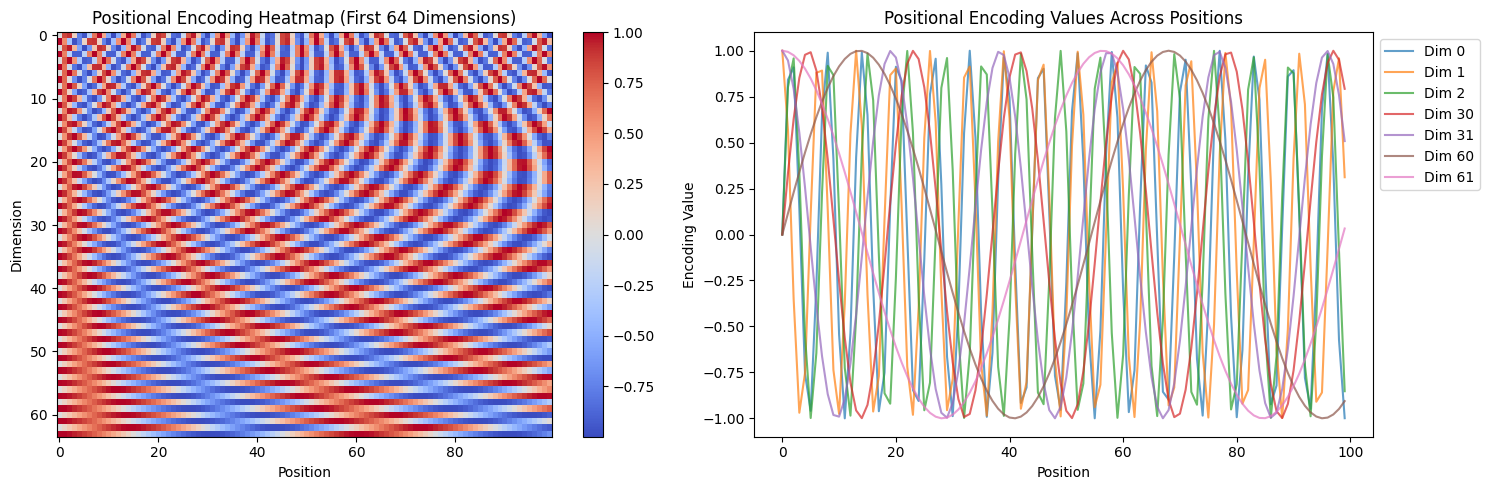

In [34]:
import matplotlib.pyplot as plt


def plot_positional_encodings():
    # dummy input (batch_size=1, seq_len=100, d_model=512)
    dummy_input = torch.zeros((1, 100, 512))

    # pure positional encodings (without word embeddings)
    pe = positional_encoding_original_paper(dummy_input)

    # convert to numpy and squeeze batch dimension
    pe = pe.squeeze(0).detach().numpy()

    plt.figure(figsize=(15, 5))

    # Plot 1: Heatmap of first 64 dimensions
    plt.subplot(1, 2, 1)
    plt.imshow(pe[:, :64].T, cmap="coolwarm", aspect="auto")
    plt.xlabel("Position")
    plt.ylabel("Dimension")
    plt.title("Positional Encoding Heatmap (First 64 Dimensions)")
    plt.colorbar()

    # Plot 2: Sine/Cosine waves for selected dimensions
    plt.subplot(1, 2, 2)
    for i in [0, 1, 2, 30, 31, 60, 61]:
        plt.plot(pe[:, i], label=f"Dim {i}", alpha=0.7)

    plt.xlabel("Position")
    plt.ylabel("Encoding Value")
    plt.title("Positional Encoding Values Across Positions")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


plot_positional_encodings()